In [1]:
# !pip install matplotlib seaborn

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [16]:
# Ruta de la carpeta de evaluaciones
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
RESULTS_DIR = os.path.join(PROJECT_ROOT, "data", "evaluations")

# Obtener la lista de archivos de evaluación
evaluation_files = [f for f in os.listdir(RESULTS_DIR) if f.endswith('.xlsx')]

# Mostrar los archivos disponibles
print("Archivos de evaluación disponibles:")
for idx, file in enumerate(evaluation_files, 1):
    print(f"{idx}. {file}")

Archivos de evaluación disponibles:
1. evaluation_faiss_distiluse-base-multilingual-cased-v1_huggingface_llama-3.2-1b-preview_groq.xlsx
2. evaluation_faiss_distiluse-base-multilingual-cased-v1_huggingface_llama-3.2-3b-preview_groq.xlsx
3. evaluation_faiss_distiluse-base-multilingual-cased-v1_huggingface_mixtral-8x7b-32768_groq.xlsx
4. evaluation_faiss_mrm8488_multilingual-e5-large-ft-sts-spanish-matryoshka-768-16-5e_huggingface_llama-3.2-1b-preview_groq.xlsx
5. evaluation_faiss_mrm8488_multilingual-e5-large-ft-sts-spanish-matryoshka-768-16-5e_huggingface_llama-3.2-3b-preview_groq.xlsx
6. evaluation_faiss_mrm8488_multilingual-e5-large-ft-sts-spanish-matryoshka-768-16-5e_huggingface_mixtral-8x7b-32768_groq.xlsx


In [17]:
# Seleccionar los archivos a analizar (por defecto, se cargan todos)
dfs = []
for file in evaluation_files:
    file_path = os.path.join(RESULTS_DIR, file)
    df = pd.read_excel(file_path)
    df['Archivo'] = file  # Agregar nombre del archivo como referencia
    dfs.append(df)

# Combinar todos los archivos en un solo DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Mostrar primeras filas del conjunto combinado
display(combined_df.head())

,Documento,Ruta,Categoria_pregunta,Pregunta,Respuesta_Humana,Respuesta_RAG,Modelo_embedding_usado,LLM_usado,Documentos_relevantes_con_score,Score_RHvsRRAG,Archivo
0,22bis_Estudiantes-ERASMUS.pdf,extranjerIA/data/pdfs/22bis_Estudiantes-ERASMU...,Preguntas comparativas,¿En qué se diferencia la autorización de estud...,La autorización de estudios de un Estado miemb...,"Según el texto, la autorización de estudios de...",distiluse-base-multilingual-cased-v1,llama-3.2-1b-preview,[{'metadata': 'C:\\Users\\zepol\\Documents\\UA...,0.749015,evaluation_faiss_distiluse-base-multilingual-c...
1,5_Cuenta_propia-renovacion.pdf,extranjerIA/data/pdfs/5_Cuenta_propia-renovaci...,Preguntas comparativas,¿En qué se diferencia la presentación de la so...,La presentación por Internet es más rápida y p...,"Según el contexto proporcionado, la principal ...",distiluse-base-multilingual-cased-v1,llama-3.2-1b-preview,[{'metadata': 'C:\\Users\\zepol\\Documents\\UA...,0.587385,evaluation_faiss_distiluse-base-multilingual-c...
2,22bis_Estudiantes-ERASMUS.pdf,extranjerIA/data/pdfs/22bis_Estudiantes-ERASMU...,Preguntas comparativas,¿Cuál es la diferencia entre la movilidad de e...,El programa Erasmus es una iniciativa de la Un...,"Basándome en el contexto proporcionado, la pri...",distiluse-base-multilingual-cased-v1,llama-3.2-1b-preview,[{'metadata': 'C:\\Users\\zepol\\Documents\\UA...,0.818716,evaluation_faiss_distiluse-base-multilingual-c...
3,16Familiar_comunitario_inicial.pdf,extranjerIA/data/pdfs/16Familiar_comunitario_i...,Preguntas comparativas,¿Cuál es la diferencia entre una pareja de hec...,La pareja registrada cuenta con un reconocimie...,"Basándome en el contexto proporcionado, la dif...",distiluse-base-multilingual-cased-v1,llama-3.2-1b-preview,[{'metadata': 'C:\\Users\\zepol\\Documents\\UA...,0.652056,evaluation_faiss_distiluse-base-multilingual-c...
4,AUT_TRABJ_Familiares_UE_sin_TIE.pdf,extranjerIA/data/pdfs/AUT_TRABJ_Familiares_UE_...,Preguntas comparativas,¿Cuál es la diferencia entre el certificado de...,El certificado de registro es para ciudadanos ...,"Según el contexto proporcionado, la principal ...",distiluse-base-multilingual-cased-v1,llama-3.2-1b-preview,[{'metadata': 'C:\\Users\\zepol\\Documents\\UA...,0.734248,evaluation_faiss_distiluse-base-multilingual-c...


In [18]:
combined_df.shape

(240, 11)

In [19]:
num_documentos_unicos = combined_df["Documento"].nunique()
print(f"Número de documentos únicos en el dataframe: {num_documentos_unicos}")


Número de documentos únicos en el dataframe: 21


In [20]:
documentos_unicos = combined_df["Documento"].unique()
print(documentos_unicos)

['22bis_Estudiantes-ERASMUS.pdf' '5_Cuenta_propia-renovacion.pdf'
 '16Familiar_comunitario_inicial.pdf'
 'AUT_TRABJ_Familiares_UE_sin_TIE.pdf'
 'Autorizacion_estancia_estudios_inicial.pdf'
 'Extranjero_no_UE_estudiante_otro_pais_UE.pdf'
 '17Familiar_comunitario_permanente.pdf'
 '4_Busqueda_empleo_proyecto_empresarial.pdf'
 '26No_lucrativa_renovacion.pdf' 'Estudiantes-residencia_practicas.pdf'
 '27Razones_humanitarias.pdf' '1_Cuenta_ajena-inicial.pdf'
 'Guia_informativa_basica_25-05-2022.pdf' 'Autorizacion_trabajo.pdf'
 '2_cuenta_ajena-renovacion.pdf' 'Como_pedir_Cita_Previa_Madrid.pdf0'
 'GUIA_BUENAS_PRACTICAS.pdf0' 'Enlace1_Solicitar_duplicado.pdf'
 'Nota_empleadores.pdf' '4_Cuenta_ajena-modificacion_otra_situacion.pdf'
 '2Arraigo_social.pdf']


In [6]:
combined_df.columns

Index(['Documento', 'Ruta', 'Categoria_pregunta', 'Pregunta',
       'Respuesta_Humana', 'Respuesta_RAG', 'Modelo_embedding_usado',
       'LLM_usado', 'Documentos_relevantes_con_score', 'Score_RHvsRRAG',
       'Archivo'],
      dtype='object')

In [8]:
# Agrupar por configuración de embeddings y LLM
config_summary = combined_df.groupby(["Modelo_embedding_usado", "LLM_usado"]).agg(
    Promedio_Score=("Score_RHvsRRAG", "mean"),
    Cantidad_Preguntas=("Score_RHvsRRAG", "count")
).reset_index()

# Renombrar columnas para mayor claridad
config_summary.columns = [
    "Modelo de Embeddings", "Modelo LLM", "Score Promedio", "Preguntas Evaluadas"
]

# Ordenar la tabla por Score Promedio de mayor a menor
config_summary = config_summary.sort_values(by="Score Promedio", ascending=False)

# Mostrar la tabla en el notebook
display(config_summary)


,Modelo de Embeddings,Modelo LLM,Score Promedio,Preguntas Evaluadas
4,mrm8488/multilingual-e5-large-ft-sts-spanish-m...,llama-3.2-3b-preview,0.620460,40
5,mrm8488/multilingual-e5-large-ft-sts-spanish-m...,mixtral-8x7b-32768,0.609593,40
2,distiluse-base-multilingual-cased-v1,mixtral-8x7b-32768,0.604143,40
1,distiluse-base-multilingual-cased-v1,llama-3.2-3b-preview,0.603706,40
0,distiluse-base-multilingual-cased-v1,llama-3.2-1b-preview,0.570743,40
3,mrm8488/multilingual-e5-large-ft-sts-spanish-m...,llama-3.2-1b-preview,0.555570,40


In [9]:
config_summary.to_excel("config_summary.xlsx", index=False)


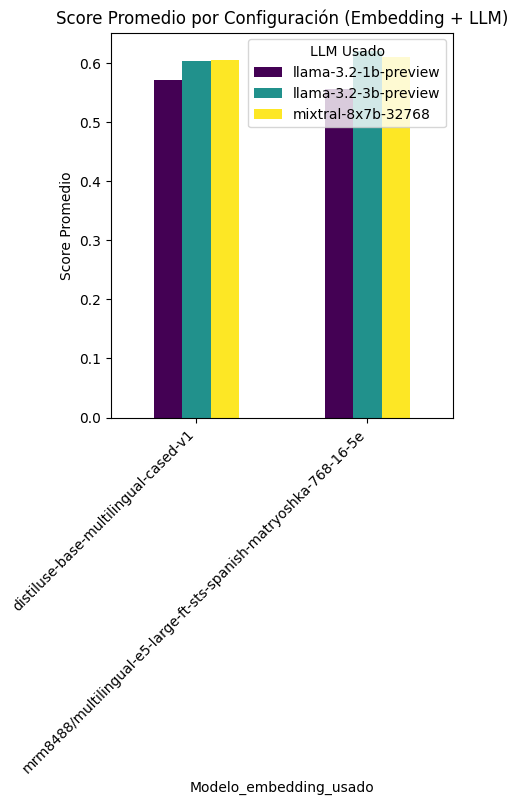

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de los gráficos
plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de Score Promedio por Configuración (Embedding + LLM)
plt.subplot(1, 3, 1)
config_avg_scores = combined_df.groupby(["Modelo_embedding_usado", "LLM_usado"])["Score_RHvsRRAG"].mean().unstack()
config_avg_scores.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.title("Score Promedio por Configuración (Embedding + LLM)")
plt.ylabel("Score Promedio")
plt.xticks(rotation=45, ha="right")
plt.legend(title="LLM Usado")
plt.show()



C:\Users\zepol\AppData\Local\Temp\ipykernel_24268\3930585295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Modelo_embedding_usado", y="Score_RHvsRRAG", data=combined_df, ax=axes[0], palette="Set2")
C:\Users\zepol\AppData\Local\Temp\ipykernel_24268\3930585295.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")
C:\Users\zepol\AppData\Local\Temp\ipykernel_24268\3930585295.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="LLM_usado", y="Score_RHvsRRAG", data=combined_df, ax=axes[1], palette="Set3")
C:\Users\zepol\AppData\

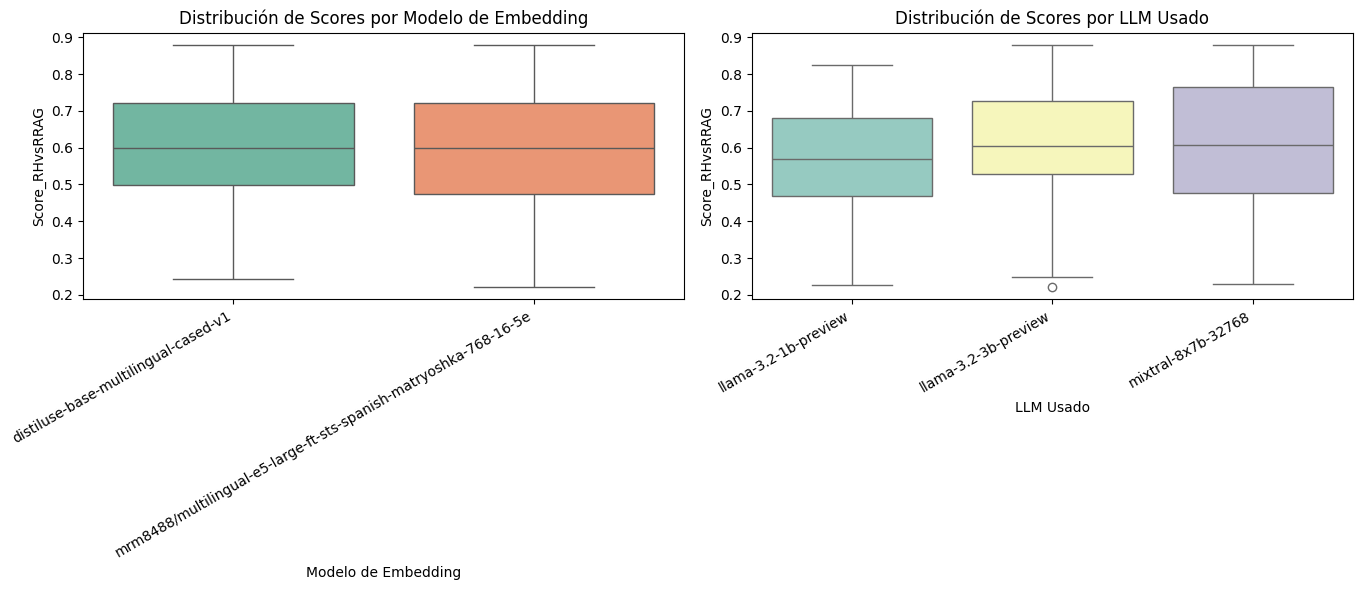

In [12]:
# Crear una figura con dos subgráficos para los Boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 2: Distribución de Scores por Modelo de Embedding
sns.boxplot(x="Modelo_embedding_usado", y="Score_RHvsRRAG", data=combined_df, ax=axes[0], palette="Set2")
axes[0].set_title("Distribución de Scores por Modelo de Embedding")
axes[0].set_xlabel("Modelo de Embedding")
axes[0].set_ylabel("Score_RHvsRRAG")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")

# Gráfico 3: Distribución de Scores por LLM Usado
sns.boxplot(x="LLM_usado", y="Score_RHvsRRAG", data=combined_df, ax=axes[1], palette="Set3")
axes[1].set_title("Distribución de Scores por LLM Usado")
axes[1].set_xlabel("LLM Usado")
axes[1].set_ylabel("Score_RHvsRRAG")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

C:\Users\zepol\AppData\Local\Temp\ipykernel_24268\1618998888.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x="Modelo_embedding_usado", y="Score_RHvsRRAG", hue="LLM_usado", ci=None)


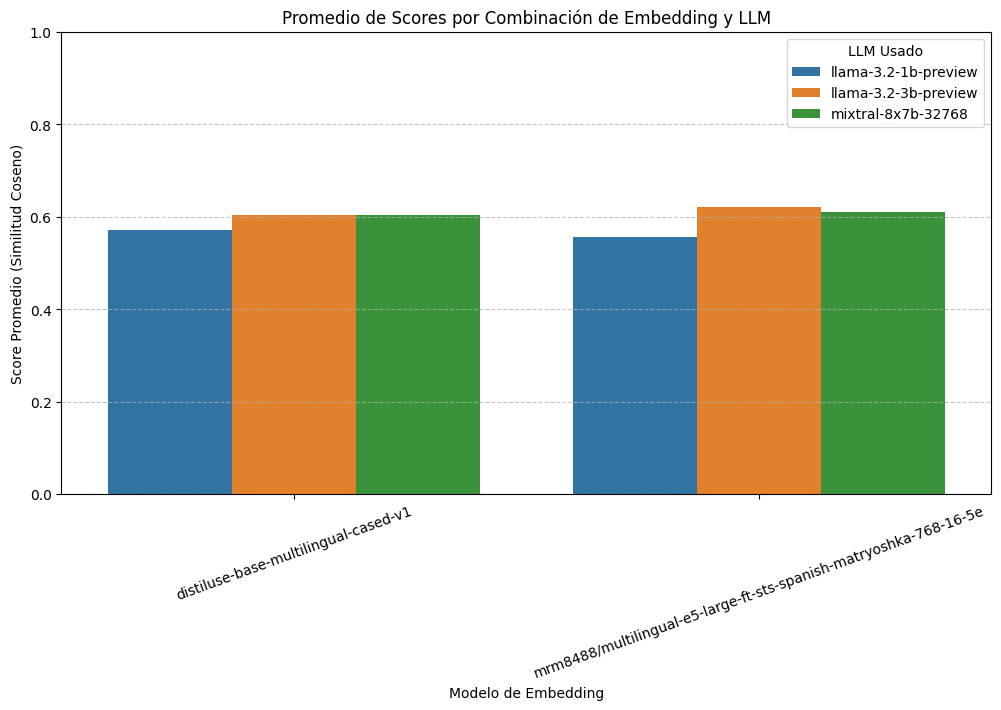

In [13]:
# Gráfico 4: Comparación de Promedio de Scores por Combinación de Embedding y LLM
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x="Modelo_embedding_usado", y="Score_RHvsRRAG", hue="LLM_usado", ci=None)
plt.title("Promedio de Scores por Combinación de Embedding y LLM")
plt.ylabel("Score Promedio (Similitud Coseno)")
plt.xlabel("Modelo de Embedding")
plt.xticks(rotation=20)
plt.legend(title="LLM Usado")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

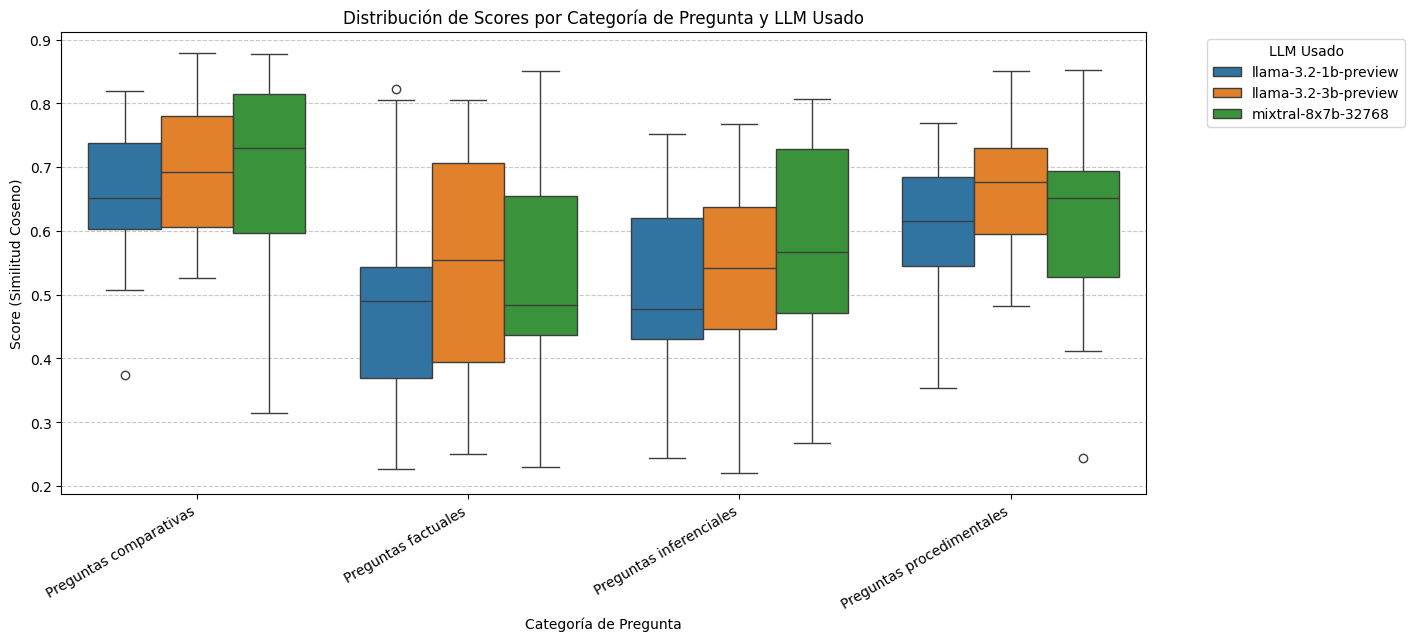

In [14]:
# Gráfico 5: Distribución de Scores por Categoría de Pregunta
plt.figure(figsize=(14, 6))
sns.boxplot(data=combined_df, x="Categoria_pregunta", y="Score_RHvsRRAG", hue="LLM_usado")
plt.title("Distribución de Scores por Categoría de Pregunta y LLM Usado")
plt.ylabel("Score (Similitud Coseno)")
plt.xlabel("Categoría de Pregunta")
plt.xticks(rotation=30, ha="right")
plt.legend(title="LLM Usado", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
# Resumen estadístico de los scores por modelo de embeddings
embedding_stats = combined_df.groupby("Modelo_embedding_usado")["Score_RHvsRRAG"].describe()
print("📊 Estadísticas por modelo de embeddings:")
display(embedding_stats)

📊 Estadísticas por modelo de embeddings:


,count,mean,std,min,25%,50%,75%,max
Modelo_embedding_usado,,,,,,,,
distiluse-base-multilingual-cased-v1,120.0,0.592864,0.154602,0.243984,0.499111,0.600266,0.722161,0.877467
mrm8488/multilingual-e5-large-ft-sts-spanish-matryoshka-768-16-5e,120.0,0.595208,0.166686,0.220384,0.472770,0.598417,0.722034,0.878925


In [8]:
# Resumen estadístico de los scores por modelo de LLM
llm_stats = combined_df.groupby("LLM_usado")["Score_RHvsRRAG"].describe()
print("\n📊 Estadísticas por modelo de LLM:")
display(llm_stats)


📊 Estadísticas por modelo de LLM:


,count,mean,std,min,25%,50%,75%,max
LLM_usado,,,,,,,,
llama-3.2-1b-preview,80.0,0.563157,0.151650,0.227163,0.468779,0.569501,0.679433,0.823197
llama-3.2-3b-preview,80.0,0.612083,0.156220,0.220384,0.528003,0.603617,0.727428,0.878925
mixtral-8x7b-32768,80.0,0.606868,0.170282,0.229856,0.477795,0.607123,0.764912,0.877467


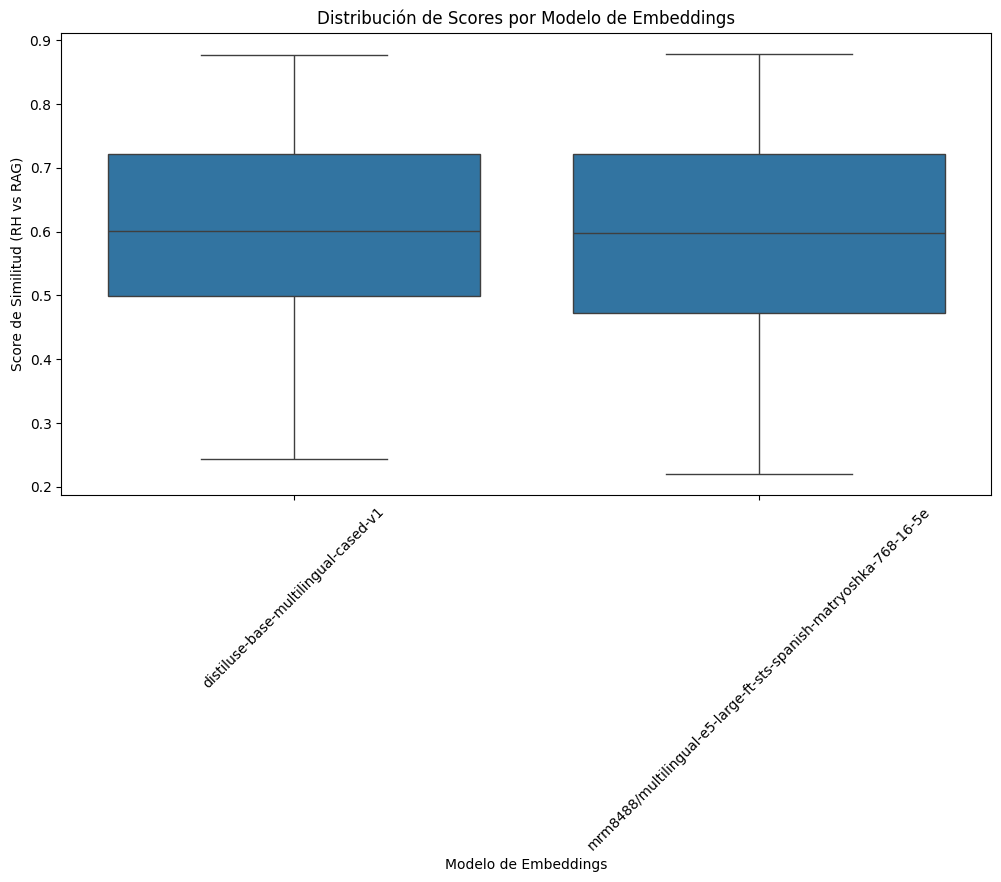

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="Modelo_embedding_usado", y="Score_RHvsRRAG", data=combined_df)
plt.title("Distribución de Scores por Modelo de Embeddings")
plt.xlabel("Modelo de Embeddings")
plt.ylabel("Score de Similitud (RH vs RAG)")
plt.xticks(rotation=45)
plt.show()

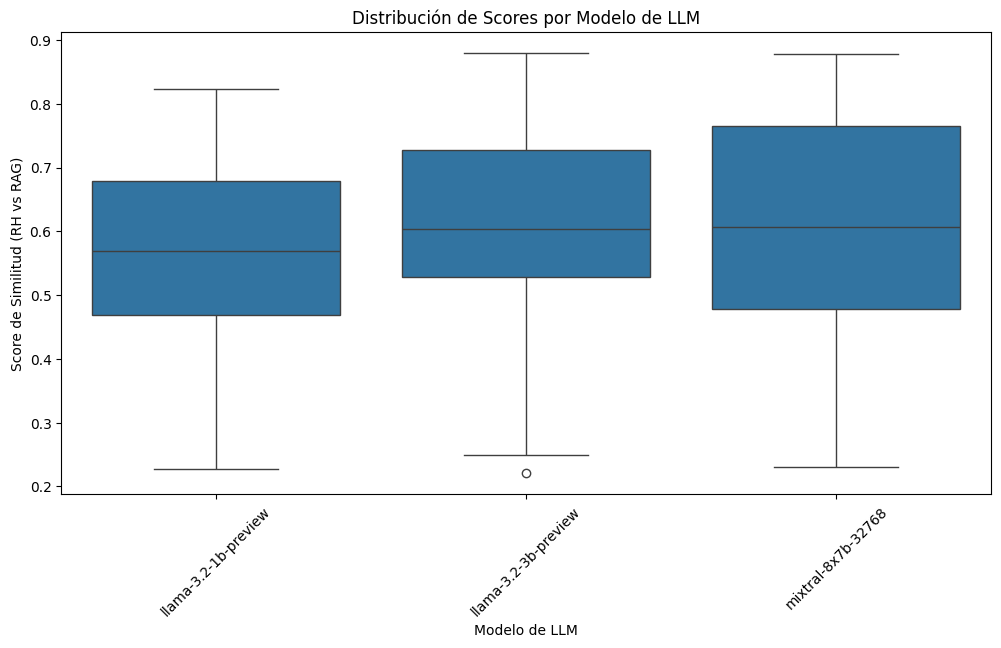

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="LLM_usado", y="Score_RHvsRRAG", data=combined_df)
plt.title("Distribución de Scores por Modelo de LLM")
plt.xlabel("Modelo de LLM")
plt.ylabel("Score de Similitud (RH vs RAG)")
plt.xticks(rotation=45)
plt.show()

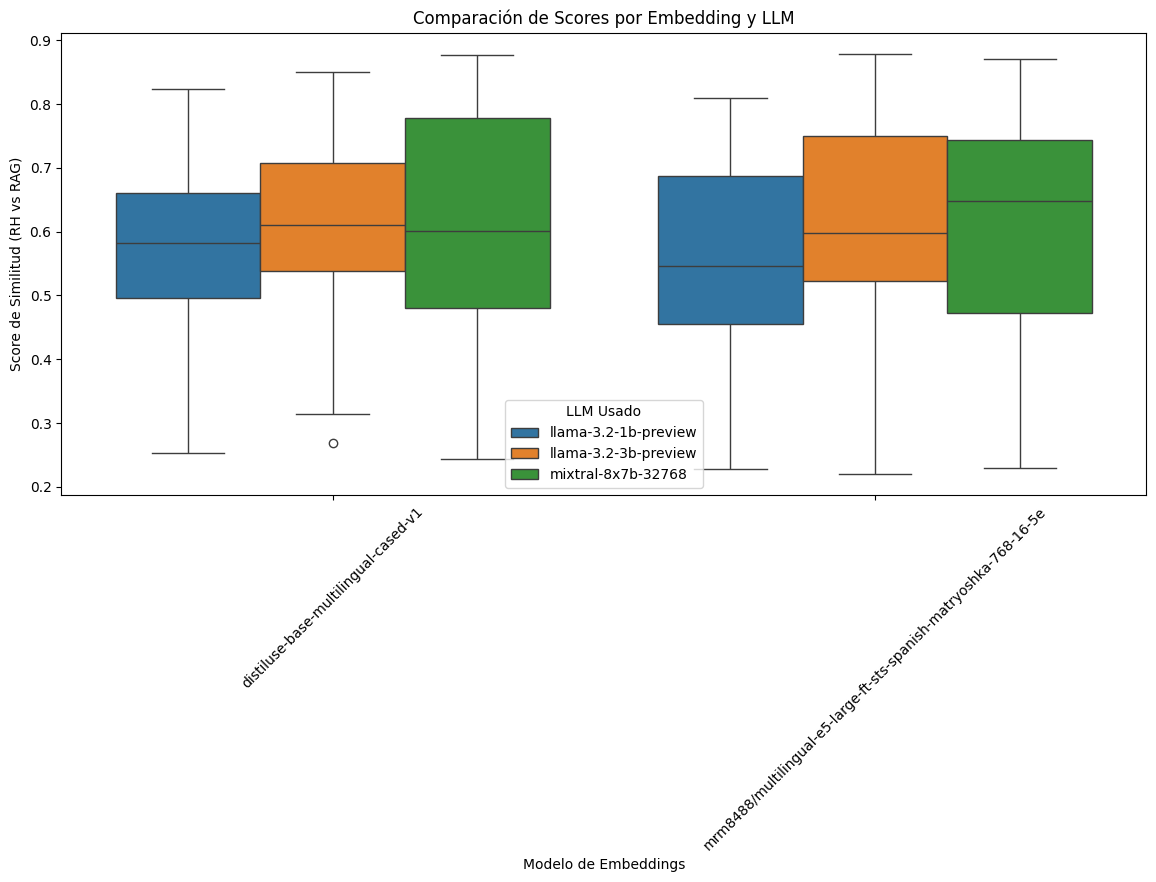

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Modelo_embedding_usado", y="Score_RHvsRRAG", hue="LLM_usado", data=combined_df)
plt.title("Comparación de Scores por Embedding y LLM")
plt.xlabel("Modelo de Embeddings")
plt.ylabel("Score de Similitud (RH vs RAG)")
plt.xticks(rotation=45)
plt.legend(title="LLM Usado")
plt.show()

📊 Promedio de Score por LLM:


LLM_usado
llama-3.2-3b-preview    0.612083
mixtral-8x7b-32768      0.606868
llama-3.2-1b-preview    0.563157
Name: Score_RHvsRRAG, dtype: float64

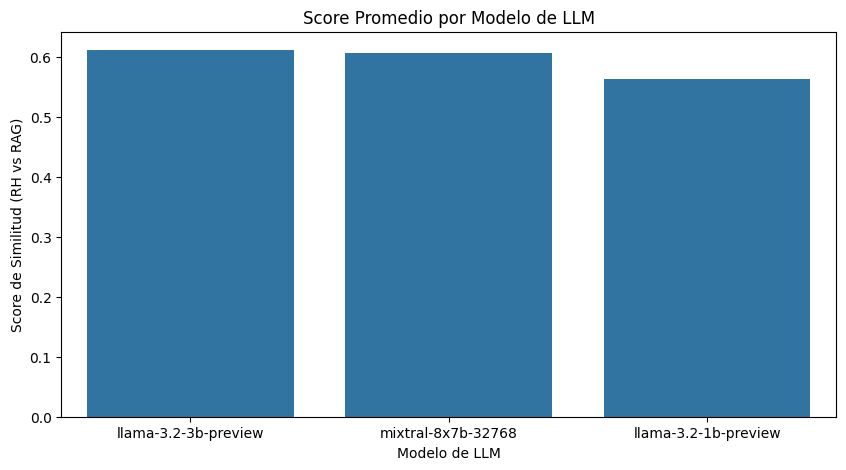

In [12]:
llm_comparison = combined_df.groupby("LLM_usado")["Score_RHvsRRAG"].mean().sort_values(ascending=False)
print("📊 Promedio de Score por LLM:")
display(llm_comparison)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=llm_comparison.index, y=llm_comparison.values)
plt.title("Score Promedio por Modelo de LLM")
plt.ylabel("Score de Similitud (RH vs RAG)")
plt.xlabel("Modelo de LLM")
plt.show()

📊 Promedio de Score por Modelo de Embeddings:


Modelo_embedding_usado
mrm8488/multilingual-e5-large-ft-sts-spanish-matryoshka-768-16-5e    0.595208
distiluse-base-multilingual-cased-v1                                 0.592864
Name: Score_RHvsRRAG, dtype: float64

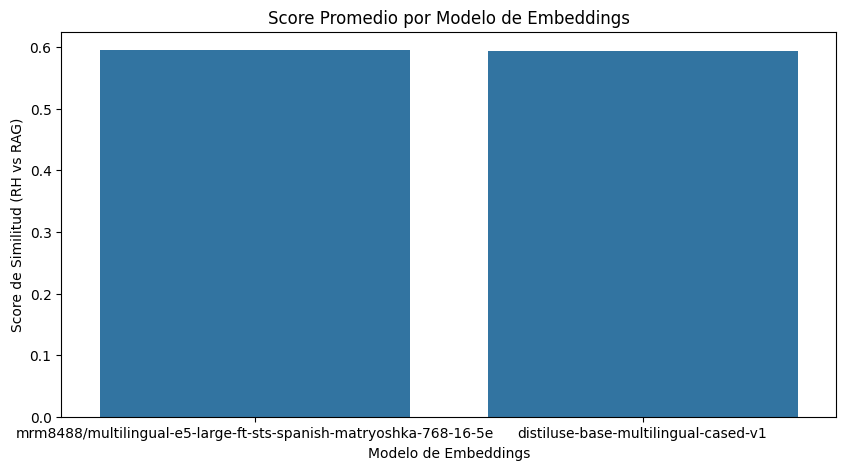

In [13]:
embedding_comparison = combined_df.groupby("Modelo_embedding_usado")["Score_RHvsRRAG"].mean().sort_values(ascending=False)
print("📊 Promedio de Score por Modelo de Embeddings:")
display(embedding_comparison)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=embedding_comparison.index, y=embedding_comparison.values)
plt.title("Score Promedio por Modelo de Embeddings")
plt.ylabel("Score de Similitud (RH vs RAG)")
plt.xlabel("Modelo de Embeddings")
plt.show()


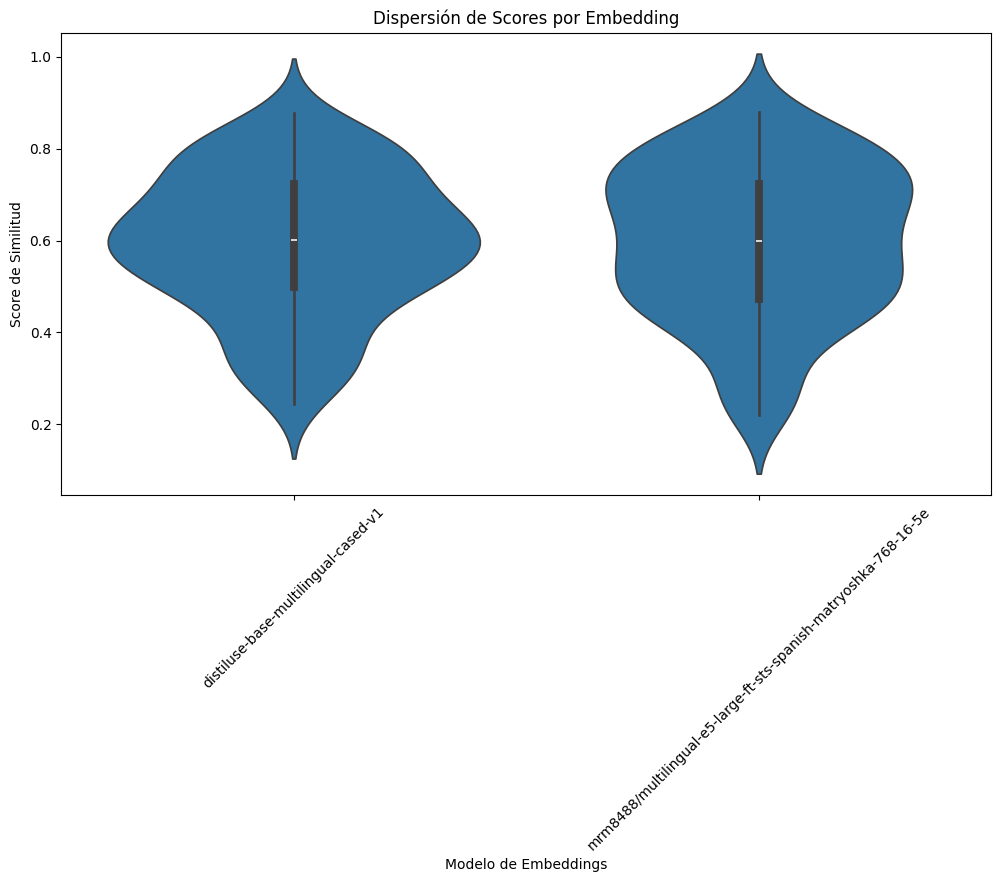

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Modelo_embedding_usado", y="Score_RHvsRRAG", data=combined_df)
plt.title("Dispersión de Scores por Embedding")
plt.xlabel("Modelo de Embeddings")
plt.ylabel("Score de Similitud")
plt.xticks(rotation=45)
plt.show()

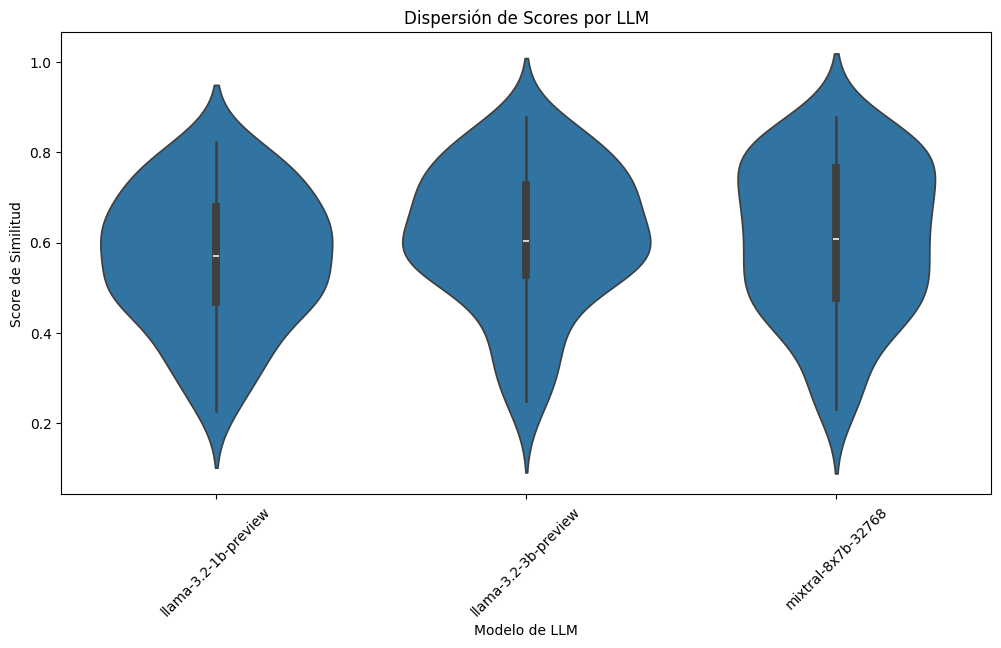

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="LLM_usado", y="Score_RHvsRRAG", data=combined_df)
plt.title("Dispersión de Scores por LLM")
plt.xlabel("Modelo de LLM")
plt.ylabel("Score de Similitud")
plt.xticks(rotation=45)
plt.show()

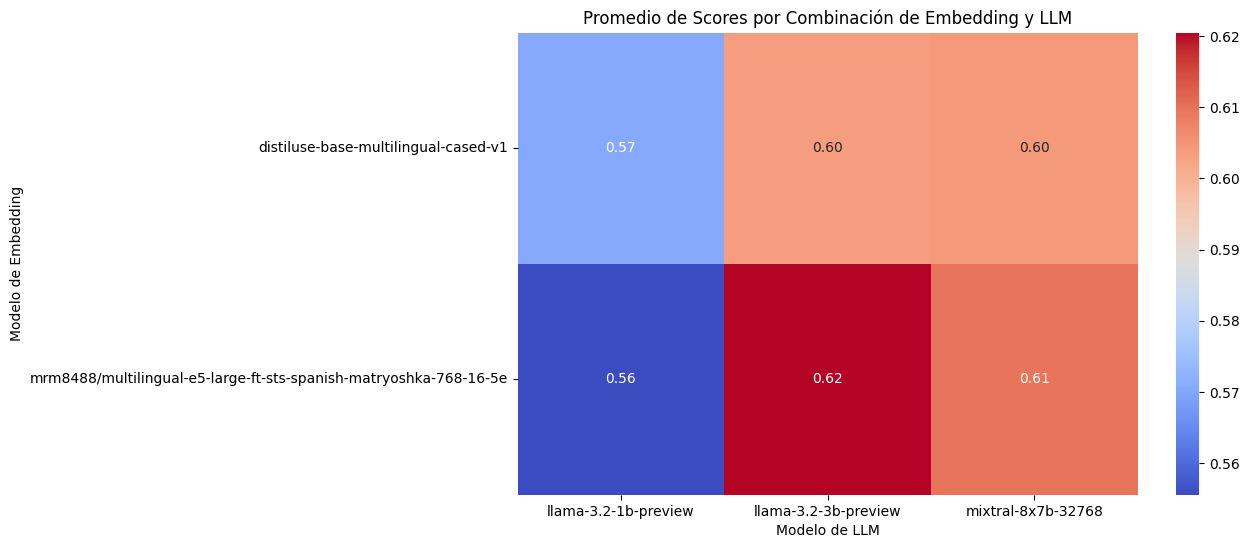

In [18]:
pivot_table = combined_df.pivot_table(values="Score_RHvsRRAG", index="Modelo_embedding_usado", columns="LLM_usado", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Promedio de Scores por Combinación de Embedding y LLM")
plt.xlabel("Modelo de LLM")
plt.ylabel("Modelo de Embedding")
plt.show()

C:\Users\zepol\AppData\Local\Temp\ipykernel_22092\114230867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=question_scores.values, y=question_scores.index, palette="coolwarm")


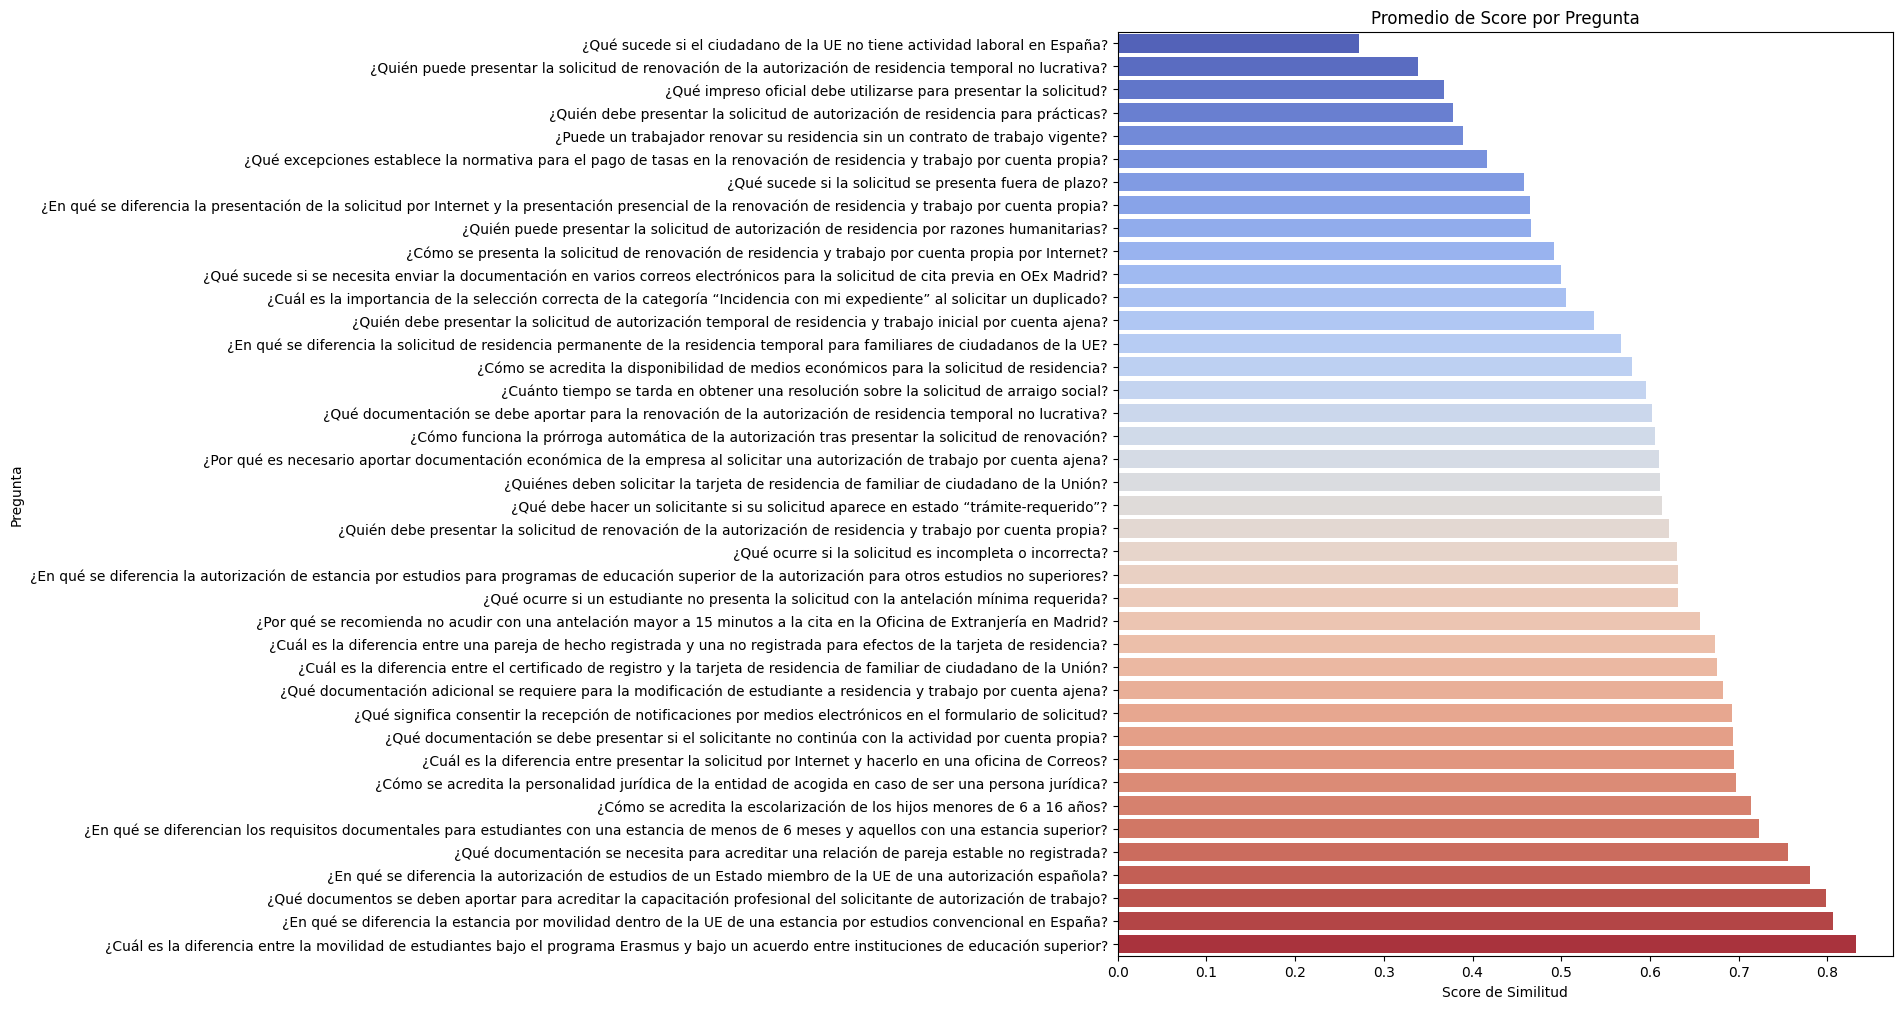

In [19]:
question_scores = combined_df.groupby("Pregunta")["Score_RHvsRRAG"].mean().sort_values()

plt.figure(figsize=(10, 12))
sns.barplot(x=question_scores.values, y=question_scores.index, palette="coolwarm")
plt.title("Promedio de Score por Pregunta")
plt.xlabel("Score de Similitud")
plt.ylabel("Pregunta")
plt.show()

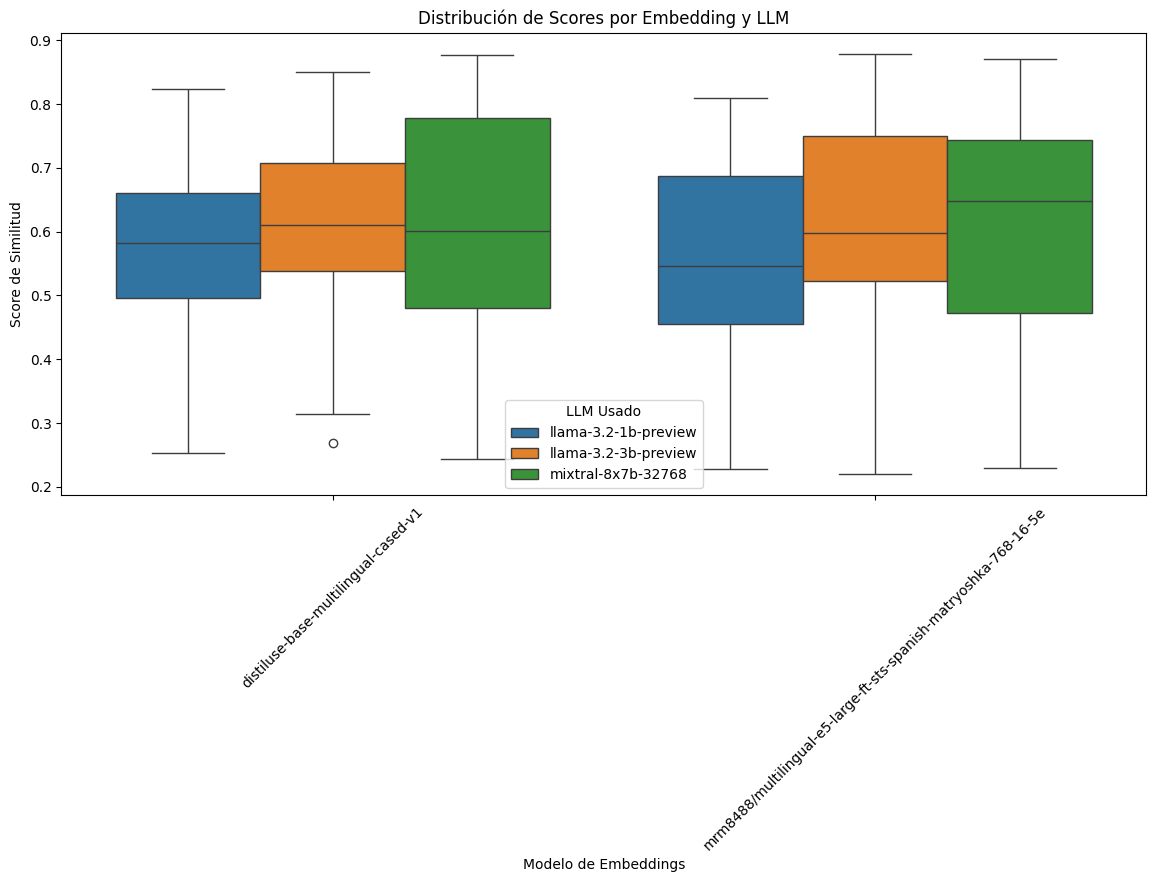

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Modelo_embedding_usado", y="Score_RHvsRRAG", hue="LLM_usado", data=combined_df)
plt.title("Distribución de Scores por Embedding y LLM")
plt.xlabel("Modelo de Embeddings")
plt.ylabel("Score de Similitud")
plt.xticks(rotation=45)
plt.legend(title="LLM Usado")
plt.show()

## Análisis descriptivo por categorías de pregunta

In [13]:
# Agrupar por categoría de pregunta y calcular estadísticas descriptivas del score
category_summary = combined_df.groupby("Categoria_pregunta")["Score_RHvsRRAG"].describe()
display(category_summary)

# Calcular la media del score por categoría
category_avg_score = combined_df.groupby("Categoria_pregunta")["Score_RHvsRRAG"].mean().reset_index()
display(category_avg_score)

,count,mean,std,min,25%,50%,75%,max
Categoria_pregunta,,,,,,,,
Comparativas,44.0,0.742134,0.098701,0.421763,0.681481,0.745842,0.817053,0.894642
Factuales,62.0,0.677308,0.147723,0.337055,0.563152,0.718225,0.776333,0.873217
Inferenciales,32.0,0.709410,0.143053,0.465352,0.611163,0.684479,0.847937,0.935288
Procedimentales,38.0,0.589030,0.133854,0.317889,0.512103,0.586928,0.676819,0.895053


,Categoria_pregunta,Score_RHvsRRAG
0,Comparativas,0.742134
1,Factuales,0.677308
2,Inferenciales,0.709410
3,Procedimentales,0.589030


C:\Users\zepol\AppData\Local\Temp\ipykernel_13932\2316735642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Categoria_pregunta", y="Score_RHvsRRAG", data=combined_df, palette="viridis")


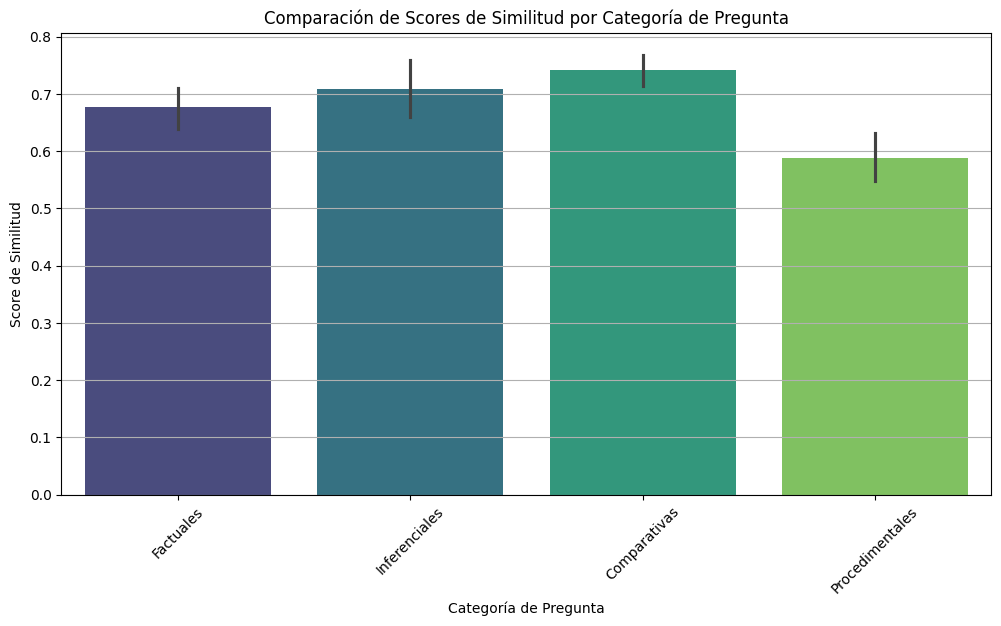

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Categoria_pregunta", y="Score_RHvsRRAG", data=combined_df, palette="viridis")
plt.title("Comparación de Scores de Similitud por Categoría de Pregunta")
plt.xlabel("Categoría de Pregunta")
plt.ylabel("Score de Similitud")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


C:\Users\zepol\AppData\Local\Temp\ipykernel_13932\428417712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Categoria_pregunta", y="Score_RHvsRRAG", data=combined_df, palette="coolwarm")


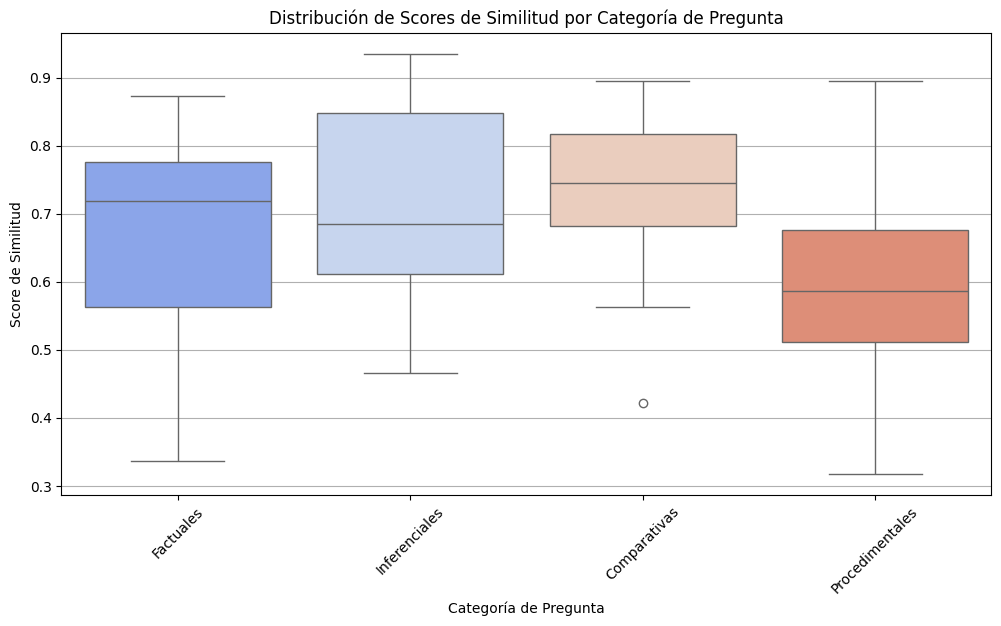

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Categoria_pregunta", y="Score_RHvsRRAG", data=combined_df, palette="coolwarm")
plt.title("Distribución de Scores de Similitud por Categoría de Pregunta")
plt.xlabel("Categoría de Pregunta")
plt.ylabel("Score de Similitud")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
# Identificar las preguntas con mejor desempeño por categoría
top_questions = combined_df.loc[combined_df.groupby("Categoria_pregunta")["Score_RHvsRRAG"].idxmax()]
print("Preguntas con mejor desempeño por categoría:")
display(top_questions[["Categoria_pregunta", "Pregunta", "Score_RHvsRRAG"]])

# Identificar las preguntas con peor desempeño por categoría
worst_questions = combined_df.loc[combined_df.groupby("Categoria_pregunta")["Score_RHvsRRAG"].idxmin()]
print("Preguntas con peor desempeño por categoría:")
display(worst_questions[["Categoria_pregunta", "Pregunta", "Score_RHvsRRAG"]])

Preguntas con mejor desempeño por categoría:


,Categoria_pregunta,Pregunta,Score_RHvsRRAG
45,Comparativas,¿Cuál es la diferencia entre la autorización d...,0.894642
109,Factuales,¿Cuál es el plazo para solicitar la renovación...,0.873217
2,Inferenciales,¿Por qué se otorga un resguardo acreditativo a...,0.935288
32,Procedimentales,¿Cuáles son los pasos para presentar documenta...,0.895053


Preguntas con peor desempeño por categoría:


,Categoria_pregunta,Pregunta,Score_RHvsRRAG
70,Comparativas,¿En qué se diferencian los requisitos para emp...,0.421763
171,Factuales,¿Cuáles son las vías disponibles para presenta...,0.337055
9,Inferenciales,¿Por qué no se puede enviar el duplicado de la...,0.465352
164,Procedimentales,¿Cuáles son los pasos para presentar una solic...,0.317889
